### Installation of the NeuroAnnotation Toolbox (NAT)

In [1]:
!pip3 uninstall -q -y nat
!pip3 install -q --upgrade  --force-reinstall  git+https://github.com/christian-oreilly/neurocurator.git@natLib

Exception:
Traceback (most recent call last):
  File "/home/oreilly/.local/lib/python3.4/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/home/oreilly/.local/lib/python3.4/site-packages/pip/commands/install.py", line 317, in run
    prefix=options.prefix_path,
  File "/home/oreilly/.local/lib/python3.4/site-packages/pip/req/req_set.py", line 742, in install
    **kwargs
  File "/home/oreilly/.local/lib/python3.4/site-packages/pip/req/req_install.py", line 831, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/home/oreilly/.local/lib/python3.4/site-packages/pip/req/req_install.py", line 1032, in move_wheel_files
    isolated=self.isolated,
  File "/home/oreilly/.local/lib/python3.4/site-packages/pip/wheel.py", line 346, in move_wheel_files
    clobber(source, lib_dir, True)
  File "/home/oreilly/.local/lib/python3.4/site-packages/pip/wheel.py", line 317, in clobber
    ensure_dir(destdir)
  File "/h

### Installation of other standard toolboxes

In [2]:
!pip3 install -q matplotlib seaborn gitpython

### Downloading the corpus

In [3]:
from git import Repo
import os

git_url = "https://github.com/christian-oreilly/corpus-thalamus.git"
repo_dir = os.path.join(os.getcwd(), "neurocuratorDB")
if not os.path.isdir(repo_dir):
    Repo.clone_from(git_url, repo_dir)
else:
    Repo(repo_dir).remotes.origin.pull()

### Imports

In [11]:
# Stadard imports
import sys, os
import matplotlib.pylab as plt
import seaborn as sns
import quantities as pq
import numpy as np

# NAT imports
from nat.annotationSearch import ParameterSearch, ConditionAtom

### Searching for annotated maximal ionic current conductances and showing the three first records

In [12]:
searcher = ParameterSearch(repo_dir)
searcher.setSearchConditions(ConditionAtom("Parameter name", "conductance_ion_curr_max"))
searcher.expandRequiredTags = True
searcher.onlyCentralTendancy = True
resultDF = searcher.search()
resultDF[:3]

,Cell,Context,Parameter instance ID,Parameter name,Parameter type ID,Result type,Text,Transmembrane ionic current,Unit,Values,obj_annotation,obj_parameter
0,Thalamus relay cell,,3e8c9756-02df-11e6-93a1-3417ebb8f5ca,conductance_ion_curr_max,BBP-030003,pointValue,Table 2,Inward rectifier (h-type) current,mS/cm^2,0.03,"""7aabe8de-02dc-11e6-93a1-3417ebb8f5ca"";""Values...","{'id': '3e8c9756-02df-11e6-93a1-3417ebb8f5ca',..."
1,Thalamus relay cell,,389f0aec-02dd-11e6-93a1-3417ebb8f5ca,conductance_ion_curr_max,BBP-030003,pointValue,Table 2,Sodium transient fast current,mS/cm^2,300.00,"""7aabe8de-02dc-11e6-93a1-3417ebb8f5ca"";""Values...","{'id': '389f0aec-02dd-11e6-93a1-3417ebb8f5ca',..."
2,Thalamus ventroposterior nucleus principal neuron,nces with biophysical parameters\ntaken from p...,ceabe9c4-f289-11e5-b804-64006a4c56ef,conductance_ion_curr_max,BBP-030003,pointValue,Fast transiente sodium current,Sodium transient fast current,S/cm^2,0.01,"""9091d010-ea76-11e5-a1a8-c869cd917532"";""From D...","{'id': 'ceabe9c4-f289-11e5-b804-64006a4c56ef',..."


### Checking which conductances have been specified as "specific conductances" (i.e., conductance densities) and normalizing the units.

In [13]:
isSpecific = []
allConductances = []
for v, u in zip(resultDF["Values"], resultDF["Unit"]):
    try:
        allConductances.append(float(pq.Quantity(v, u).rescale('S/cm**2')))
        isSpecific.append(True)
    except:
        isSpecific.append(False)

### Plotting the result of our query

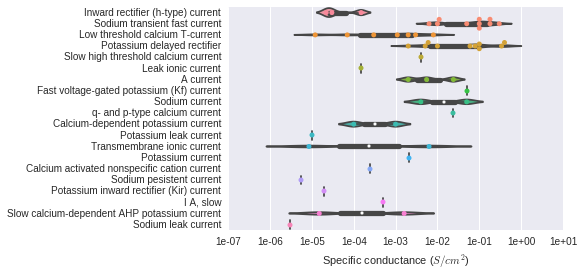

In [14]:
%matplotlib inline

resultDF = resultDF[isSpecific]
resultDF["Values"] = np.log10(allConductances)

# Plotting a violin plot for annotated values for specific conductances
# of the various kind of ionic currents 
g = sns.violinplot(y="Transmembrane ionic current", x="Values", data=resultDF, bw=0.25)
g = sns.swarmplot( y="Transmembrane ionic current", x="Values", data=resultDF)
g.set_ylabel("")
g.set_xlabel("Specific conductance ($S/cm^2$)")
g.set_xticklabels([('%.0e' % 10**nb) for nb in g.get_xticks()]) 
plt.plot()
plt.savefig('example_currents.png', bbox_inches='tight', transparent=True, dpi=200)

### Printing the JSON representation of a specific annotation of the plot

In [9]:
import json
record = resultDF[resultDF["Transmembrane ionic current"] == "Fast voltage-gated potassium (Kf) current"]
print(json.dumps(record["obj_annotation"].values[0].toJSON(), 
                 sort_keys=True, indent=4, separators=(',', ': ')))

{
    "annotId": "8e3edae6-ef34-11e5-ba5d-c869cd917532",
    "authors": [
        "iavarone",
        "oreilly"
    ],
    "comment": "Fast potassium current parameters",
    "experimentProperties": [],
    "localizer": {
        "location": 26404,
        "text": "The gKIR and the\nfast voltage-gated potassium channel ( gKf) had conductances of 20 \u0002s/\ncm2 and 50 mS/cm2, respectively. Both potassium channels had reversal\npotentials of 100 mV.",
        "type": "text"
    },
    "parameters": [
        {
            "description": {
                "depVar": {
                    "typeId": "BBP-030003",
                    "values": {
                        "statistic": "raw",
                        "type": "simple",
                        "unit": "mS/cm^2",
                        "values": [
                            50.0
                        ]
                    }
                },
                "type": "pointValue"
            },
            "id": "e47c93ba-ffdc-1

### Showing the annotated text in its context

In [10]:
nbContextChar = 400
context = record["obj_annotation"].values[0].getContext(nbContextChar)
from IPython.display import HTML
HTML(context[:nbContextChar] +  '<b>' + context[nbContextChar:-nbContextChar]
      + '</b>' + context[-nbContextChar:])